In [8]:
#Imports needed
import numpy as np
import matplotlib.pyplot
import random
#Number of columns/elements/genes for each chromosome
num_genes = 2

#Number of chromosomes (rows in population)
num_chromosomes = 8

#Number of parents for crossover
num_chromosomes_mating = 4

#Population size which is number of chromosomes by genes in each chromosome
pop_size = (num_chromosomes,num_genes) # The population will have num_chromosomes chromosome where each chromosome has num_genes genes.

#The limits of the genes in the whole population
low_limit = -5
high_limit = 5

In [9]:
#Calculation of Fitness

#Fitness Function Helper to be able to loop 
def cal_pop_fitness_helper(x,y):
    fitness2 = (x - 3.14)**2 + (y - 2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    return fitness2

#Main Fitness Function
def cal_pop_fitness(pop):
    fitness = []
    for parent in pop:
        fitness.append(cal_pop_fitness_helper(parent[0],parent[1]))
    return fitness

In [10]:
#Mating function to select the best parents from the fitness that will continue to the crossover
def select_mating_pool(pop, fitness, num_chromosomes):
# Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_chromosomes, pop.shape[1]))
    #Loop with number of parents that are wanted to be mated
    for parent_num in range(num_chromosomes):
        #Get index of the parents with the minimum fitness as trying to find global minimum
        min_fitness_idx = np.where(fitness == np.min(fitness))
        #Getting the index
        min_fitness_idx = min_fitness_idx[0][0]
        #Putting the parents with the minimum fitness in the parents list
        parents[parent_num, :] = pop[min_fitness_idx, :]
        ##Filling the emtpy index in fitness with a high number to prevent selecting it again
        fitness[min_fitness_idx] = 99999999999
    return parents

In [11]:
#The repair function that changes value to high if it was a higher value and low if it was a lower value in both genes in each chromosome
def repair(offspring,low,high):
    if offspring[0]>high:
        offspring[0] = high
    elif offspring[0]<low:
        offspring[0] = low
    if offspring[1]>high:
        offspring[1] = high
    elif offspring[1]<low:
        offspring[1] = low
    return offspring

In [12]:
#Crossover Function
def crossover(parents, offspring_size):
    #Initialize offspring array
    offspring = np.empty(offspring_size)
    #Loop through offspring size to fill with the result of parent mating
    for k in range(offspring_size[0]):
        #Getting the index of the first parent to mate
        parent1_idx = k%parents.shape[0]
        #Getting the index of the second parent to mate
        parent2_idx = (k+1)%parents.shape[0]
        #********************************************************************************************************************************
        #Making crossover and Repairing the crossover offspring to be within the limits of the equation
        offspring[k] = repair([parents[parent1_idx,0],parents[parent2_idx,1]],low_limit,high_limit)
    return offspring

In [13]:
#Mutation function that takes crossover offsprings and the mutation probability ranging from (0,1) and returns the mutated offsprings
def mutation(offspring_crossover, mutation_probability):
    # Mutation Number is how many genes will be mutated from the entire crossover offsprings. Calculated by mutation_probability*number_of_crossover_offsprings*number_of_genes
    mutation_number = int(np.ceil(mutation_probability*offspring_crossover.shape[0]*num_genes))
    # Mutated offspring array contains random unique numbers from 0 to the total population size(number of chromosomes * number of genes).
    mutated_offspring_array = random.sample(range(0,offspring_crossover.shape[0]*num_genes),mutation_number)
    #Looping the mutation number
    for i in range(mutation_number):
        #Getting offspring_index by getting element i in mutated_offspring_array and dividing by number of genes
        offspring_idx = int(mutated_offspring_array[i]/2)
        #Getting gene_index by getting element i in mutated_offspring_array and getting remainder after dividing by number of genes
        gene_idx = int(mutated_offspring_array[i]%2)
        #Mutating a gene inside offspring_crossover at offspring_idx  with a random number within the range.
        offspring_crossover[offspring_idx, gene_idx] = np.random.uniform(-5, 5, 1)  
    # Returning the resulting offspring after mutating the crossover offsprings
    mutated_offsprings = offspring_crossover
    return mutated_offsprings

[[ 4.98531847  4.32667655]
 [ 1.0064826   1.48295198]
 [-3.64969638  2.74776658]
 [-3.32563475 -4.4276665 ]
 [ 4.56754058  1.83936204]
 [-2.57557248 -4.11176214]
 [-2.91847335  1.58163672]
 [-3.91508378  0.30782777]]
Generation :  0
Fitness
[5.505960860629158, 4.2494851013716515, 46.3777916959585, 91.57983249244303, 2.7644432071638274, 79.93016628765815, 36.13422669425136, 55.90430164226926]
Best result :  2.7644432071638274
Parents
[[ 4.56754058  1.83936204]
 [ 1.0064826   1.48295198]
 [ 4.98531847  4.32667655]
 [-2.91847335  1.58163672]]
Crossover
[[ 4.56754058  1.48295198]
 [ 1.0064826   4.32667655]
 [ 4.98531847  1.58163672]
 [-2.91847335  1.83936204]]
Mutation
[[ 4.56754058  1.48295198]
 [ 1.0064826   4.32667655]
 [ 4.98531847  1.58163672]
 [-2.91847335 -4.64699875]]
Generation :  1
Fitness
[2.7644432071638274, 4.2494851013716515, 5.505960860629158, 36.13422669425136, 3.2564907478853433, 6.30394805180041, 3.0962439770825743, 89.10955800925994]
Best result :  2.7644432071638274
Par

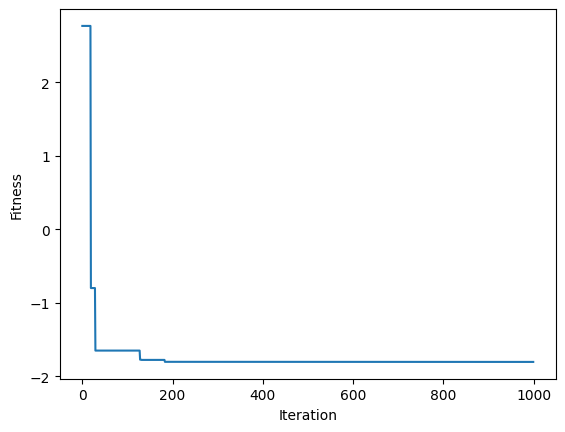

In [14]:
#Initialize a population
new_population = np.random.uniform(low=-5, high=5,size=pop_size)
print(new_population)
#Initialize number of generations
num_generations = 1000
#Initialize a list to store best output of fitness
best_outputs = []

#Looping through the number of generations set
for generation in range(num_generations):
    print("Generation : ", generation)
    # Calculating the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(new_population)
    print("Fitness")
    print(fitness)
    print("Best result : ", np.min(fitness))
    # Storing the best output from the calculated fitness
    best_outputs.append(np.min(fitness))
    # Choosing the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness,num_chromosomes_mating)
    print("Parents")
    print(parents)
    # Mating the parents using the crossover technique to create new generation of offsprings.
    offspring_crossover = crossover(parents,offspring_size=(pop_size[0]-parents.shape[0], num_genes))
    print("Crossover")
    print(offspring_crossover)
    # Mutating some of the offsprings after crossover.
    offspring_mutation = mutation(offspring_crossover,0.1)
    print("Mutation")
    print(offspring_mutation)
    #Setting the new population with the best parents that were used in crossover and the resulted offspring after crossover and mutation.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Calculating fitness of the last generation of parents and offsprings.
fitness = cal_pop_fitness(new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.min(fitness))
#Printing
print("Best solution : ", new_population[best_match_idx])
print("Best solution fitness : ", fitness[best_match_idx[0][0]])
# Drawing a curve of the evolution of the solution using the best solution array that was stored while looping over the generations.
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()